C:\Users\dhruv\AppData\Local\Temp\ipykernel_19356\1984863938.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['title'].resample('M').count()


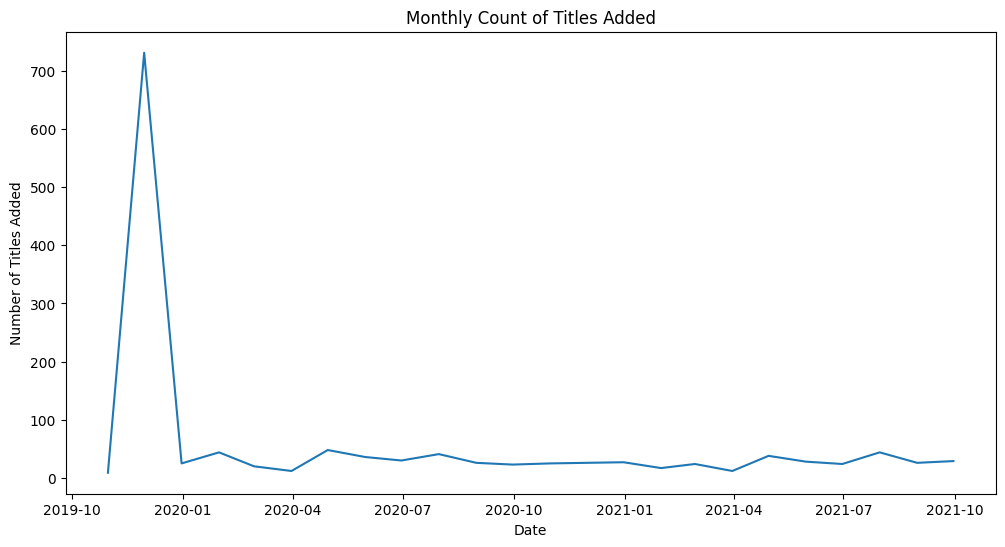

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\dhruv\OneDrive\Desktop\Intership Python\Task 6\disney_plus_titles.csv"
df = pd.read_csv(file_path)

# Assuming there is a 'date_added' column in the dataset
df['date_added'] = pd.to_datetime(df['date_added'])

# Set 'date_added' as the index
df.set_index('date_added', inplace=True)

# Resample the data by month and count the number of titles added
monthly_data = df['title'].resample('M').count()

# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data)
plt.title('Monthly Count of Titles Added')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.show()


                            title  \
0                   A Spark Story   
1                  Spooky Buddies   
2          The Fault in Our Stars   
3                 Dog: Impossible   
4  Spidey And His Amazing Friends   

                                         description  sentiment  
0  Two Pixar filmmakers strive to bring their uni...      0.000  
1  The puppies go on a spooky adventure through a...      0.000  
2  Hazel and Gus share a love that sweeps them on...      0.650  
3  Matt Beisner uses unique approaches to modifyi...      0.375  
4  Spidey teams up with pals to become The Spidey...      0.000  


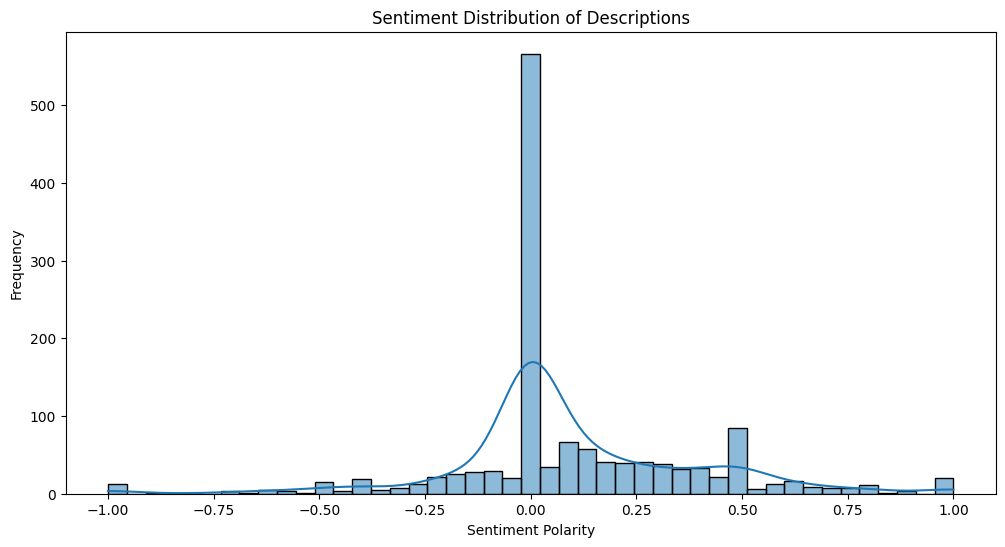

In [9]:
from textblob import TextBlob

# Load the dataset
file_path = "C:/Users/dhruv/OneDrive/Desktop/Intership Python/Task 6/disney_plus_titles.csv"
df = pd.read_csv(file_path)

# Perform sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the first few rows with sentiment scores
print(df[['title', 'description', 'sentiment']].head())

# Plot the sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution of Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


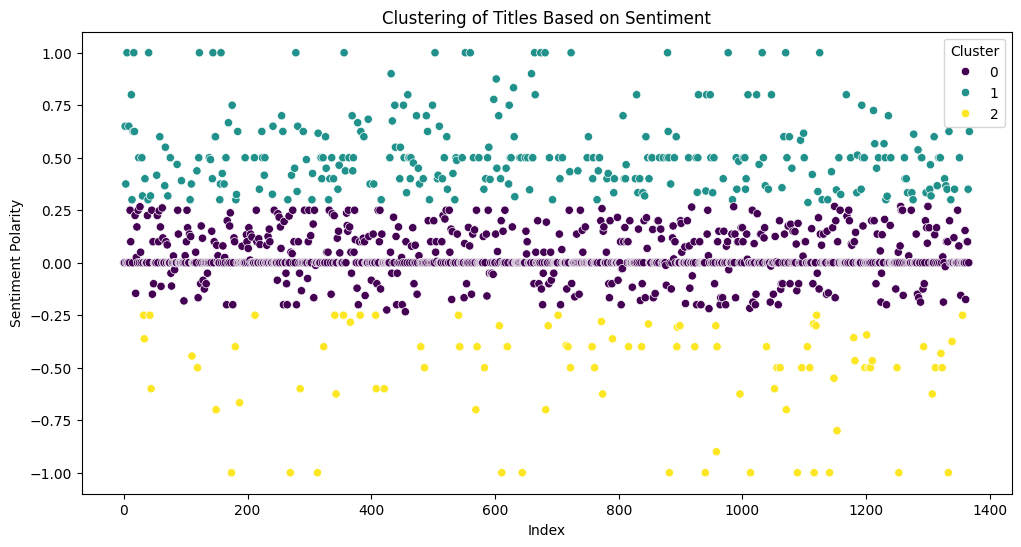

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\dhruv\OneDrive\Desktop\Intership Python\Task 6\disney_plus_titles.csv"
df = pd.read_csv(file_path)

# Perform sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Select features for clustering
X = df[['sentiment']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y='sentiment', hue='cluster', data=df, palette='viridis')
plt.title('Clustering of Titles Based on Sentiment')
plt.xlabel('Index')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Cluster')
plt.show()
